In [61]:
library(ggplot2)
library(reshape)
library(plyr)
library(ggpubr)
library(scales)

In [13]:
#constants
data_path = "/home/anat/Research/ExAC/10.Prediction/CV_splits/pfam-v31/"
ligands_list <- c("rna", "dna", "ion", "peptide", "sm")
ligands_str <- c("RNA", "DNA", "ion", "peptide", "small\nmolecule")
filename <- "domain_5_folds_combined_dna0.5_rna0.5_ion0.75_prec_group_stats_df.csv"
colors_list <- c("#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00")

In [28]:
#Read table and 
pos_neg_table <- read.csv(paste0(data_path, filename), header = TRUE, sep = '\t', row.names = 1)
pos_neg_table["ligand"] <- rownames(pos_neg_table)
pos_table <- subset(pos_neg_table, endsWith(ligand, "pos"))
neg_table <- subset(pos_neg_table, endsWith(ligand, "neg"))

#Arrange ligands factors
pos_table$ligand <- mapvalues(pos_table$ligand, paste0(ligands_list,"_pos"), ligands_str)
neg_table$ligand <- mapvalues(neg_table$ligand, paste0(ligands_list,"_neg"), ligands_str)
pos_table$ligand <- factor(pos_table$ligand, levels =ligands_str)
neg_table$ligand <- factor(neg_table$ligand, levels =ligands_str)

#flat table for plotting
pos_neg_table_melted <- melt(pos_neg_table, id="ligand")
colnames(pos_neg_table_melted) <- c("ligand", "group", "num")
pos_table_melted <- melt(pos_table, id="ligand")
colnames(pos_table_melted) <- c("ligand", "group", "num")
neg_table_melted <- melt(neg_table, id="ligand")
colnames(neg_table_melted) <- c("ligand", "group", "num")

In [54]:
#Plot the ligands in each group - positives
pos_plot <- ggplot(pos_table_melted, aes(x=group, y=num, fill=ligand, label=num)) +
    geom_bar(stat="identity") +
    scale_fill_manual(values = colors_list) +
    geom_text(size = 3, color="white", position = position_stack(vjust = 0.5)) +
    ggtitle("binding positions") +
    ylab("") + 
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5,size=12))

In [59]:
#Plot the ligands in each group - negatives
neg_plot <- ggplot(neg_table_melted, aes(x=group, y=num, fill=ligand, label=comma(num)) +
    geom_bar(stat="identity") +
    scale_fill_manual(values = colors_list) +
    geom_text(size = 3, color="white", position = position_stack(vjust = 0.5)) +
    ggtitle("Dataset non-binding positions") +
    ylab("") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size=12))

png 
  2

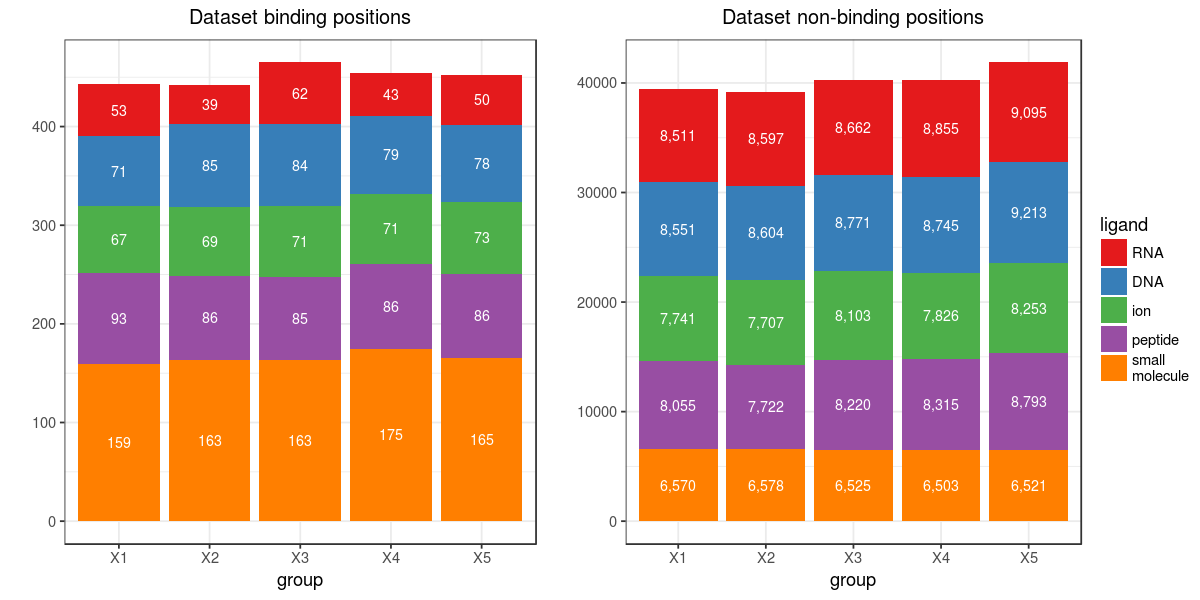

In [66]:
options(repr.plot.width=10, repr.plot.height=5)
final_fig <- ggarrange(plotlist=list(pos_plot, neg_plot), ncol = 2, nrow=1, common.legend = TRUE, legend = "right")
pdf("plots/ligands_by_cv_groups.pdf", width=10, height=5)
final_fig
dev.off()
final_fig